<a href="https://colab.research.google.com/github/joshred83/cda_project/blob/main/ainet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LassoCV
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import sparse
from sklearn.metrics import r2_score
import numpy as np

In [92]:
df = pd.read_csv("https://ai-jobs.net/salaries/download/salaries.csv")

In [93]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [94]:
for col in df.select_dtypes("object"):
  print(col)
  display(df[col].unique())


experience_level


array(['SE', 'MI', 'EN', 'EX'], dtype=object)

employment_type


array(['FT', 'CT', 'PT', 'FL'], dtype=object)

job_title


array(['AI Software Development Engineer', 'Data Manager',
       'Data Engineer', 'Data Analyst', 'Data Science',
       'Business Intelligence', 'Data Scientist',
       'Master Data Specialist', 'Machine Learning Engineer',
       'Data Analytics Manager', 'Research Scientist',
       'Research Engineer', 'Research Analyst', 'Data Architect',
       'Business Intelligence Engineer', 'Robotics Engineer',
       'Machine Learning Modeler', 'AI Engineer', 'ML Engineer',
       'NLP Engineer', 'Applied Scientist', 'Data Operations Manager',
       'Data Science Manager', 'Data Modeler',
       'Data Integration Specialist', 'Data Product Manager',
       'Data Visualization Specialist', 'Data Specialist',
       'Business Intelligence Lead', 'Business Intelligence Analyst',
       'AI Software Engineer', 'Machine Learning Scientist',
       'Data Science Engineer', 'Machine Learning Operations Engineer',
       'Analytics Engineer', 'Data Management Analyst',
       'Encounter Data Mana

salary_currency


array(['INR', 'USD', 'GBP', 'CAD', 'EUR', 'DKK', 'ILS', 'BRL', 'CHF',
       'NZD', 'AUD', 'PLN', 'PHP', 'TRY', 'NOK', 'JPY', 'ZAR', 'HKD',
       'SGD', 'THB', 'HUF', 'MXN', 'CLP'], dtype=object)

employee_residence


array(['IN', 'US', 'GB', 'CA', 'AU', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ',
       'AR', 'ES', 'KE', 'LV', 'GE', 'DE', 'IL', 'FI', 'AT', 'HR', 'BR',
       'CH', 'AE', 'GR', 'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX',
       'PT', 'BA', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG',
       'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA', 'RU',
       'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK',
       'CF', 'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

company_location


array(['IN', 'US', 'GB', 'CA', 'AU', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ',
       'AR', 'ES', 'KE', 'LV', 'DE', 'IL', 'FI', 'AT', 'BR', 'CH', 'AE',
       'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX', 'PT', 'BA', 'IT',
       'AS', 'IE', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU', 'GI',
       'CO', 'SI', 'GR', 'MU', 'RU', 'KR', 'CZ', 'QA', 'GH', 'SE', 'AD',
       'EC', 'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR',
       'BS', 'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

company_size


array(['L', 'M', 'S'], dtype=object)

In [95]:

df = df.loc[df["salary_currency"].eq("USD") &
            df["employee_residence"].eq("US"),
           ["work_year","salary", "job_title", "employment_type","remote_ratio", "experience_level", "company_size"]]
y = df["salary"]
del df["salary"]


In [96]:
# prompt: Using dataframe df: create a transformation pipeline. Encode the variables employment type, experience level, expertise level and company size.  rewrite this to reflect changes to the data frame

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Create a OneHotEncoder object
ohe = OneHotEncoder(drop='first', sparse=True)
cvect = CountVectorizer()
df_ohe = ohe.fit_transform(df[['employment_type', 'experience_level', 'company_size']])
df_cvect = cvect.fit_transform(df["job_title"])
ohe_shape = df_ohe.shape
cvect_shape = df_cvect.shape

X = sparse.hstack([df_ohe, df_cvect])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [97]:
lasso = LassoCV(cv=10, n_jobs=-1, )

lasso.fit(X=X, y = y.values.ravel())

LassoCV(cv=10, n_jobs=-1)

In [100]:
lasso.score(X, y)

0.2525793867262558

In [111]:
# prompt: evaluate lasso model

lasso_pred = lasso.predict(X)

r2_score(y_true=y, y_pred=lasso_pred)
np.r_[ohe.get_feature_names_out(), cvect.get_feature_names_out()][lasso.coef_ >0 ]


array(['employment_type_FT', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'company_size_M', 'ai', 'analytics',
       'applied', 'architect', 'computer', 'deep', 'engineer', 'head',
       'infrastructure', 'lead', 'learning', 'manager', 'ml', 'of',
       'principal', 'product', 'prompt', 'research', 'science',
       'scientist', 'software', 'vision'], dtype=object)

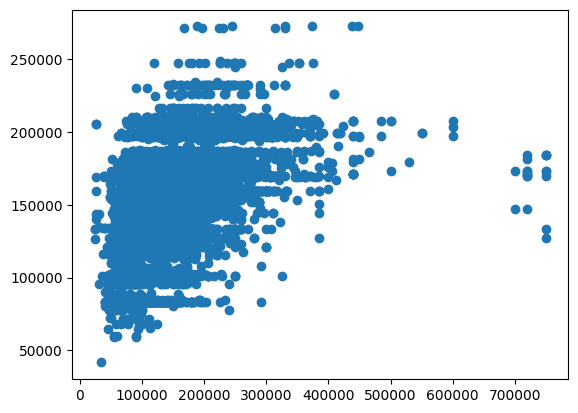

In [114]:
import matplotlib.pyplot as plt
plt.scatter(y, lasso_pred)